In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, ZeroPadding2D, MaxPooling2D, Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.datasets import fashion_mnist as mnist
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Loading MNIST fashion data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
y_train.shape

(60000,)

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [0]:
y_train=to_categorical(y_train, 10)

In [0]:
y_test=to_categorical(y_test, 10)

# Model with neither preproceesing nor overfitting control

In [0]:
def fashionModel_1(input_shape):
  x_input=Input(input_shape)
  
  x=Conv2D(32,(5,5))(x_input)
  x=Activation('relu')(x)
  x=MaxPooling2D((2,2))(x)
  
  x=Conv2D(64,(5,5))(x)
  x=Activation('relu')(x)
  x=MaxPooling2D((2,2))(x)
  
  
  x=Flatten()(x)
  x=Dense(128, activation='relu')(x)
  x=Dense(64, activation='relu')(x)
  x=Dense(10, activation='softmax')(x)
  model=Model(inputs=x_input, outputs=x)
  return model

In [0]:
fashionModel1=fashionModel_1((28,28,1))

In [10]:
fashionModel1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

# With normalization, Dropout and Batch normalization

In [0]:
X_train_norm = X_train.astype('float32')/255
X_test_norm = X_test.astype('float32')/255

In [0]:
def fashionModel_2(input_shape):
  x_input=Input(input_shape)
  
  x=Conv2D(32,(5,5))(x_input)
  x=BatchNormalization(axis=3)(x)
  x=Activation('relu')(x)
  x=MaxPooling2D((2,2))(x)
  
  x=Conv2D(64,(5,5))(x)
  x=BatchNormalization(axis=3)(x)
  x=Activation('relu')(x)
  x=MaxPooling2D((2,2))(x)
  
  
  x=Flatten()(x)
  x=Dense(128, activation='relu')(x)
  x=Dropout(0.5)(x)
  x=Dense(64, activation='relu')(x)
  x=Dropout(0.5)(x)
  x=Dense(10, activation='softmax')(x)
  model=Model(inputs=x_input, outputs=x)
  return model

In [0]:
fashionModel2=fashionModel_2((28,28,1))

In [38]:
fashionModel2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 64)          256       
__________

# Compiling and training models

In [0]:
optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10**-9, decay=0.0, amsgrad=False)

In [0]:
fashionModel1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [0]:
fashionModel2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [18]:
history1=fashionModel1.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_test,y_test), batch_size=1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 61us/step - loss: 2.0949 - categorical_accuracy: 0.6497 - val_loss: 0.5279 - val_categorical_accuracy: 0.8116
Epoch 2/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.4354 - categorical_accuracy: 0.8438 - val_loss: 0.4138 - val_categorical_accuracy: 0.8542
Epoch 3/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3537 - categorical_accuracy: 0.8729 - val_loss: 0.3679 - val_categorical_accuracy: 0.8707
Epoch 4/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.3070 - categorical_accuracy: 0.8897 - val_loss: 0.3550 - val_categorical_accuracy: 0.8725
Epoch 5/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.2806 - categorical_accuracy: 0.8981 - val_loss: 0.3353 - val_categorical_accuracy: 0.8769
Epoch 6/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.2523 - categor

In [40]:
history2=fashionModel2.fit(x=X_train_norm, y=y_train, epochs=30, validation_data=(X_test_norm,y_test), batch_size=1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 71us/step - loss: 1.1707 - categorical_accuracy: 0.5792 - val_loss: 1.0875 - val_categorical_accuracy: 0.6226
Epoch 2/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.6734 - categorical_accuracy: 0.7500 - val_loss: 0.5631 - val_categorical_accuracy: 0.7967
Epoch 3/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.5875 - categorical_accuracy: 0.7858 - val_loss: 0.4754 - val_categorical_accuracy: 0.8167
Epoch 4/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.5373 - categorical_accuracy: 0.8102 - val_loss: 0.4315 - val_categorical_accuracy: 0.8479
Epoch 5/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.4986 - categorical_accuracy: 0.8259 - val_loss: 0.4027 - val_categorical_accuracy: 0.8614
Epoch 6/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.4689 - categor

In [21]:
loss1, acc1=fashionModel1.evaluate(X_test, y_test)
print("loss= "+str(loss1))
print("test accuracy= "+str(acc1))

10000/10000 [==============================] - 1s 92us/step
loss= 0.4460291605144739
test accuracy= 0.901


In [42]:
loss2, acc2=fashionModel2.evaluate(X_test_norm, y_test)
print("loss= "+str(loss2))
print("test accuracy= "+str(acc2))

10000/10000 [==============================] - 1s 133us/step
loss= 0.27148887996077536
test accuracy= 0.9088


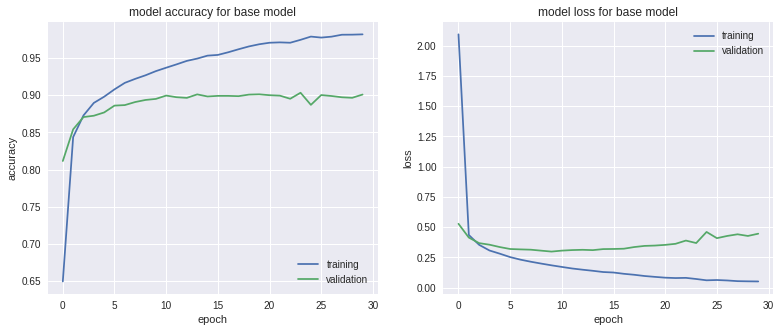

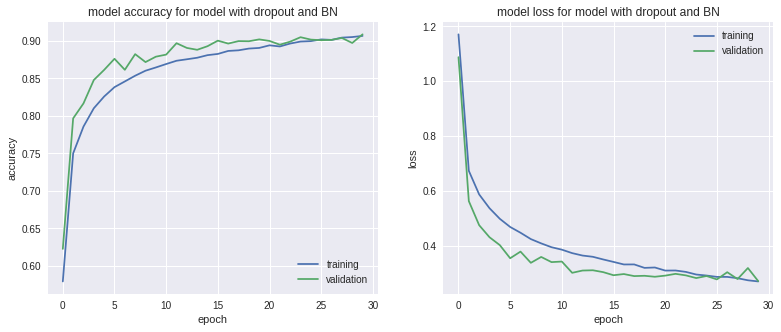

In [46]:
def plot_accuracy_loss(history, model_type):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
    ax1.plot(history.history[ 'categorical_accuracy'])
    ax1.plot(history.history['val_categorical_accuracy'])
    ax1.set_title('model accuracy for '+model_type)
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['training', 'validation'], loc='lower right')
    
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss for '+model_type)
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['training', 'validation'], loc='upper right')
    plt.show()
    

# summarize accuracy
plot_accuracy_loss(history1, 'base model')


# summarize accuracy
plot_accuracy_loss(history2, 'model with dropout and BN')

